In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('/home/lotufo/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [2]:
def conv_media(f,window):
    H,W = window
    
    #Tratando caso de quando a janela é maior que a imagem
    if (H > f.shape[0]):
        newRow = np.zeros((H - f.shape[0],f.shape[1]))
        f = np.vstack([f,newRow])
    
    if (W > f.shape[1]):
        newCol = np.zeros((f.shape[0],W - f.shape[0]))
        f = np.hstack([f,newCol])
                
    # Criando H-1 e W-1, linhas e colunas extras para realizar a convolução periódica corretamente          
    fc = np.zeros( ( f.shape[0]+(H),f.shape[1]+(W) ) )
    fc[H:,W:]=f
    
    # Ajuste de periodicidade da imagem
    fc[1:H,:] = fc[:-(H):-1,:][::-1,:]
    fc[:,1:W] = fc[:,:-(W):-1][:,::-1]
    fc[1:H,1:W] = fc[:-(H):-1,:-(W):-1][::-1,::-1]
    
    # Imagem integral
    sat = fc.cumsum(0).cumsum(1)
     
    return (sat[H:,W:] - sat[:-H,W:] - sat[H:,:-W] + sat[:-H,:-W])/(H*W)

In [3]:
def conv_media2(f,window):
    H,W = window
    f1 = np.empty(((f.shape[0]+H-1),(f.shape[1]+W-1)))
    f1[(H-1):,(W-1):] = f
    if H>1:
        f1[:(H-1),(W-1):] = f[(f.shape[0]-(H-1)):,:]
    if W>1:
        f1[(H-1):,:(W-1)] = f[:,(f.shape[1]-(W-1)):]
    if (H>1)&(W>1):
        f1[:(H-1),:(W-1)] = f[(f.shape[0]-(H-1)):,(f.shape[1]-(W-1)):]
    sat = f1.cumsum(1).cumsum(0)
    A = np.zeros_like(sat)
    B = np.zeros_like(sat)
    C = np.zeros_like(sat)
    D = np.zeros_like(sat)
    A = sat
    B[:,W:] = ia.ptrans(sat,(0,W))[:,W:]
    C[H:,:] = ia.ptrans(sat,(H,0))[H:,:]
    D[H:,W:] = ia.ptrans(sat,(H,W))[H:,W:]
    g = A + D - C - B
    g = g[(H-1):,(W-1):]
    return g

In [4]:
testing = (__name__ == '__main__')

if testing:
    import sys,os
    ! jupyter nbconvert --to 'python' conv_media

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_12/')
    if path not in sys.path:
        sys.path.append(path)
    import conv_media as convm

[NbConvertApp] Converting notebook conv_media.ipynb to python
[NbConvertApp] Writing 5387 bytes to conv_media.py


## Teste numérico

In [5]:
if testing:
    f = np.arange(1,17).reshape(4,4)
    H, W = (1,2)
    h = np.ones((H,W))/(H*W)

    g = convm.conv_media(f,h.shape)
    g2 = ia.pconv(f,h)

    print('g:\n',g)
    print('g2:\n',g2)

g:
 [[  2.5   1.5   2.5   3.5]
 [  6.5   5.5   6.5   7.5]
 [ 10.5   9.5  10.5  11.5]
 [ 14.5  13.5  14.5  15.5]]
g2:
 [[  2.5   1.5   2.5   3.5]
 [  6.5   5.5   6.5   7.5]
 [ 10.5   9.5  10.5  11.5]
 [ 14.5  13.5  14.5  15.5]]


In [6]:
if testing:
    f = np.arange(1,17).reshape(4,4)
    H, W = (2,2)
    h = np.ones((H,W))/(H*W)

    g = convm.conv_media(f,h.shape)
    g2 = ia.pconv(f,h)

    print('g:\n',g)
    print('g2:\n',g2)

g:
 [[  8.5   7.5   8.5   9.5]
 [  4.5   3.5   4.5   5.5]
 [  8.5   7.5   8.5   9.5]
 [ 12.5  11.5  12.5  13.5]]
g2:
 [[  8.5   7.5   8.5   9.5]
 [  4.5   3.5   4.5   5.5]
 [  8.5   7.5   8.5   9.5]
 [ 12.5  11.5  12.5  13.5]]


In [7]:
if testing:    
    f = np.arange(1,17).reshape(4,4)
    H, W = (1,5)
    h = np.ones((H,W))/(H*W)

    g = convm.conv_media(f,h.shape)
    g2 = ia.pconv(f,h)

    print('g:\n',g)
    print('g2:\n',g2)

g:
 [[  2.    2.    2.    2.    2. ]
 [  5.2   5.2   5.2   5.2   5.2]
 [  8.4   8.4   8.4   8.4   8.4]
 [ 11.6  11.6  11.6  11.6  11.6]]
g2:
 [[  2.    2.    2.    2.    2. ]
 [  5.2   5.2   5.2   5.2   5.2]
 [  8.4   8.4   8.4   8.4   8.4]
 [ 11.6  11.6  11.6  11.6  11.6]]


In [8]:
if testing:    
    f = np.arange(1,21).reshape(5,4)
    H, W = (2,2)
    h = np.ones((H,W))/(H*W)

    g = convm.conv_media(f,h.shape)
    g2 = ia.pconv(f,h)

    print('g:\n',g)
    print('g2:\n',g2)

g:
 [[ 10.5   9.5  10.5  11.5]
 [  4.5   3.5   4.5   5.5]
 [  8.5   7.5   8.5   9.5]
 [ 12.5  11.5  12.5  13.5]
 [ 16.5  15.5  16.5  17.5]]
g2:
 [[ 10.5   9.5  10.5  11.5]
 [  4.5   3.5   4.5   5.5]
 [  8.5   7.5   8.5   9.5]
 [ 12.5  11.5  12.5  13.5]
 [ 16.5  15.5  16.5  17.5]]


## Teste com imagens

""
Imagem original
""
Imagem filtrada com conv_media
""
Imagem filtrada com pconv

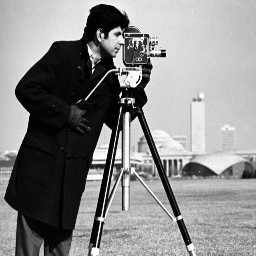
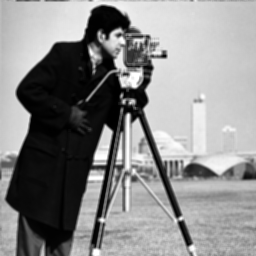
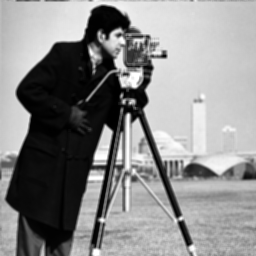

g e g2 são iguais?  True


In [9]:
if testing: 
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    H, W = (3,3)
    h = np.ones((H,W))/(H*W)

    g = convm.conv_media(f,h.shape)
    g2 = ia.pconv(f,h)
       
    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(ia.normalize(g), 'Imagem filtrada com conv_media' )
    nb.nbshow(ia.normalize(g2), 'Imagem filtrada com pconv')
    nb.nbshow()

    print('g e g2 são iguais? ', (abs(g-g2)<10E-4).all() )
    

""
Imagem original
""
Imagem filtrada com conv_media
""
Imagem filtrada com pconv

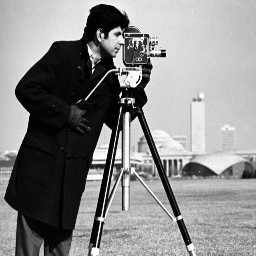
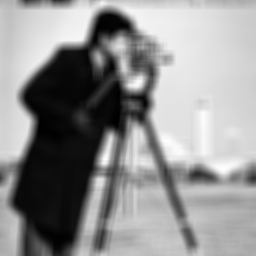
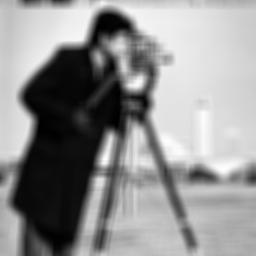

g e g2 são iguais?  True


In [10]:
if testing: 
    
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    H, W = (11,11)
    h = np.ones((H,W))/(H*W)

    g = convm.conv_media(f,h.shape)
    g2 = ia.pconv(f,h)
       
    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(ia.normalize(g), 'Imagem filtrada com conv_media' )
    nb.nbshow(ia.normalize(g2), 'Imagem filtrada com pconv')
    nb.nbshow()

    print('g e g2 são iguais? ', (abs(g-g2)<10E-4).all() )

## Teste de perfomance

In [11]:
if testing:
    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_10/')
    if path not in sys.path:
        sys.path.append(path)
    import pconvfft as conv
    
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    H, W = (3,3)
    h = np.ones((H,W))/(H*W)
    
    print('h3x3:\n')
    print('-------------------------------------------\n')
    print('conv_media:\n')
    %timeit convm.conv_media(f,h.shape)
    print('\n-------------------------------------------\n')
    print('pconv:\n')
    %timeit ia.pconv(f,h)
    print('\n-------------------------------------------\n')
    print('pconvfft:\n')
    %timeit conv.pconvfft(f,h,0)     
    print('\n-------------------------------------------\n')
    
    h = np.ones((11,11))/(H*W)
    
    print('\n\n\nh11x11:\n')
    print('-------------------------------------------\n')
    print('conv_media:\n')
    %timeit convm.conv_media(f,h.shape)
    print('\n-------------------------------------------\n')
    print('pconv:\n')
    %timeit ia.pconv(f,h)
    print('\n-------------------------------------------\n')
    print('pconvfft:\n')
    %timeit conv.pconvfft(f,h,0)     
    print('\n-------------------------------------------\n')

h3x3:

-------------------------------------------

conv_media:

100 loops, best of 3: 2.32 ms per loop

-------------------------------------------

pconv:

10 loops, best of 3: 21.5 ms per loop

-------------------------------------------

pconvfft:

100 loops, best of 3: 9.76 ms per loop

-------------------------------------------




h11x11:

-------------------------------------------

conv_media:

100 loops, best of 3: 1.19 ms per loop

-------------------------------------------

pconv:

1 loop, best of 3: 258 ms per loop

-------------------------------------------

pconvfft:

100 loops, best of 3: 9.96 ms per loop

-------------------------------------------

